In [4]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import skimage.io as io
from skimage import data
from skimage.color import rgb2hed, hed2rgb
import matplotlib.patches as patches
from skimage import measure
from skimage.color import rgb2gray
from skimage.util import img_as_ubyte
from skimage import io
from skimage.feature import greycomatrix, greycoprops

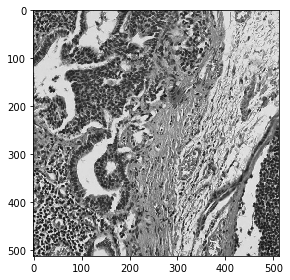

In [14]:
slide = io.imread("Camelyon_Dataset/Cancer/01_17_22.png", as_gray = True)
io.imshow(slide)

In [15]:
from itertools import groupby
def getGrayLevelRumatrix(array, theta):
        '''
        计算给定图像的灰度游程矩阵
        参数：
        array: 输入，需要计算的图像
        theta: 输入，计算灰度游程矩阵时采用的角度，list类型，可包含字段:['deg0', 'deg45', 'deg90', 'deg135']
        glrlm: 输出，灰度游程矩阵的计算结果
        '''
        P = array
        rows, cols = P.shape
        min_pixels = np.min(P)   # 图像中最小的像素值
        run_length = max(rows, cols)   # 像素的最大游行长度
        num_level = np.max(P) - np.min(P) + 1   # 图像的灰度级数

        deg0 = [val.tolist() for sublist in np.vsplit(P, rows) for val in sublist]   # 0度矩阵统计
#         print("0 degree:", deg0)

        deg90 = [val.tolist() for sublist in np.split(np.transpose(P), cols) for val in sublist]   # 90度矩阵统计
#         print("90 degree:", deg90)
        
        diags = [P[::-1, :].diagonal(i) for i in range(-P.shape[0]+1, P.shape[1])]   #45度矩阵统计
#         print("45 degree:", diags)
        
        deg45 = [n.tolist() for n in diags]
        Pt = np.rot90(P, 3)   # 135度矩阵统计
        diags = [Pt[::-1, :].diagonal(i) for i in range(-Pt.shape[0]+1, Pt.shape[1])]
        deg135 = [n.tolist() for n in diags]

        def length(l):
            if hasattr(l, '__len__'):
                return np.size(l)
            else:
                i = 0
                for _ in l:
                    i += 1
                return i

        glrlm = np.zeros((num_level, run_length, len(theta)))   # 按照统计矩阵记录所有的数据， 第三维度表示计算角度
        for angle in theta:
            for splitvec in range(0, len(eval(angle))):
#                 print(eval(angle))
                flattened = eval(angle)[splitvec]
                answer = []
                for key, iter in groupby(flattened):   # 计算单个矩阵的像素统计信息
                    answer.append((key, length(iter)))   
                for ansIndex in range(0, len(answer)):
                    glrlm[int(answer[ansIndex][0]-min_pixels), int(answer[ansIndex][1]-1), theta.index(angle)] += 1   # 每次将统计像素值减去最小值就可以填入GLRLM矩阵中
        return glrlm
    
    

In [16]:
glrlm = getGrayLevelRumatrix(slide, ["deg0"])

TypeError: 'numpy.float64' object cannot be interpreted as an integer